# Medical Diagnosis with Naive Bayes

You work for a medical research institute, and your task is to develop a diagnostic system using the Naive Bayes algorithm. You have a dataset with various medical test results, patient information, and corresponding diagnoses (e.g., presence or absence of a medical condition). Your goal is to create a classification model to aid in the medical diagnosis process. Answer the following questions based on this case study.

1. Data Exploration:

a. Load and explore the medical dataset using Python libraries like pandas. Describe the features, label, and the distribution of diagnoses.

2. Data Preprocessing:

a. Explain the necessary data preprocessing steps for preparing the medical data. This may include handling missing values, normalizing or scaling features, and encoding categorical variables.

b. Calculate the prior probabilities P(Condition) and P(No Condition) based on the class distribution.

3. Feature Engineering:

a. Describe how to convert the medical test results and patient information into suitable features for the Naive Bayes model.

b. Discuss the importance of feature selection or dimensionality reduction in medical diagnosis

4. Implementing Naive Bayes:

a. Choose the appropriate Naive Bayes variant (e.g., Gaussian, Multinomial, or Bernoulli Naive Bayes) for the medical diagnosis task and implement the classifier using Python libraries like scikit-learn.

b. Split the dataset into training and testing sets.

5. Model Training:

a. Train the Naive Bayes model using the feature-engineered dataset. Explain the probability estimation process in Naive Bayes for medical diagnosis..
6. Model Evaluation:

a. Assess the performance of the medical diagnosis model using relevant evaluation metrics, such as accuracy, precision, recall, and F1-score..

b. Interpret the results and discuss the model's ability to accurately classify medical conditions.

7. Laplace Smoothing:

a. Explain the concept of Laplace (add-one) smoothing and discuss its potential application in the context of medical diagnosis.

b. Discuss the impact of Laplace smoothing on model performance.

8. Real-World Application:

I

a. Describe the importance of accurate medical diagnosis in healthcare and research.

b. Discuss the practical implications of implementing a diagnostic system based on Naive Bayes.

9. Model Limitations:

a. Identify potential limitations of the Naive Bayes approach to medical diagnosis and discuss scenarios in which it may not perform well.

10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the medical research institute. Highlight the significance of accurate medical diagnosis and the role of Naive Bayes in healthcare.

In this case study, you can demonstrate your ability to apply the Naive Bayes algorithm to non-text data, understand the nuances of feature engineering for different types of data, and assess the model's performance in a critical domain such as medical diagnosis.

# Q1

In [112]:
import pandas as pd

# 1. Load the dataset
data = pd.read_csv("C://Users//TmC//Downloads//archive//insurance.csv")

# 2. Explore the features and label
# Assuming "charges" is the label and the rest are features
features = data.drop(columns=["charges"])
label = data["charges"]

# 3. Describe the features
print("Features:")
print(features.head())  # Display the first few rows of the features

# 4. Describe the distribution of the label (charges)
print("\nLabel (Charges) Distribution:")
label_distribution = label.describe()
print(label_distribution)

Features:
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

Label (Charges) Distribution:
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


# Q2

In [123]:
import pandas as pd

# Load the medical dataset (replace 'medical_data.csv' with the actual path)
data = pd.read_csv("C://Users//TmC//Downloads//archive//insurance.csv")

# 1. Handle Missing Values
data.fillna(0, inplace=True)  # Replace missing values with 0; you can choose a different strategy

# 2. Feature Scaling/Normalization (example: Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(data[['age', 'bmi', 'children', 'charges']])

# 3. Encoding Categorical Variables (example: One-Hot Encoding)
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# 4. Calculate Prior Probabilities
target_distribution = data['age'].value_counts()
p_condition = target_distribution[1] / len(data)
p_no_condition = target_distribution[0] / len(data)

# Print the calculated prior probabilities
print("Prior Probability of Condition (P(Condition)): ", p_condition)
print("Prior Probability of No Condition (P(No Condition)): ", p_no_condition)


Prior Probability of Condition (P(Condition)):  0.016442451420029897
Prior Probability of No Condition (P(No Condition)):  0.0515695067264574


# Q3

In [115]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the insurance dataset from 'insurance.csv'
data = pd.read_csv("C://Users//TmC//Downloads//archive//insurance.csv")

# Define a binary target variable based on a condition
data['target'] = (data['charges'] > data['charges'].mean()).astype(int)

# Encode categorical features using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Features
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

# Train a Random Forest classifier to estimate feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# List feature names and their importance scores
features = X.columns
feature_importance_dict = dict(zip(features, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the feature importance
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Feature Importance:
charges: 0.558180392103415
smoker_yes: 0.21479547075518265
smoker_no: 0.15230860784974576
age: 0.05357449604149019
bmi: 0.010864631891485375
children: 0.004593779972207545
region_southwest: 0.0013809312781030896
sex_male: 0.0010559106957885186
region_southeast: 0.000946024435809833
region_northwest: 0.0008958380290931385
region_northeast: 0.0007557382413344459
sex_female: 0.0006481787063445967


# Q4

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Load the insurance dataset from 'insurance.csv'
data = pd.read_csv("C://Users//TmC//Downloads//archive//insurance.csv")

# Define a binary target variable based on a condition
data['target'] = (data['charges'] > data['charges'].mean()).astype(int)

# Encode categorical features using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Features and target variable
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Bernoulli Naive Bayes classifier
clf = BernoulliNB()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9067164179104478
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       189
           1       1.00      0.68      0.81        79

    accuracy                           0.91       268
   macro avg       0.94      0.84      0.87       268
weighted avg       0.92      0.91      0.90       268



# Q5

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

# Load the insurance dataset from 'insurance.csv'
data = pd.read_csv("C://Users//TmC//Downloads//archive//insurance.csv")

# Define a binary target variable based on a condition
data['target'] = (data['charges'] > data['charges'].mean()).astype(int)

# Encode categorical features using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Features and target variable
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Bernoulli Naive Bayes classifier
clf = BernoulliNB()
clf.fit(X_train, y_train)

# Probability Estimation for Test Data
# Probabilities for each class (0: low premium, 1: high premium)
# For binary classification, you can use predict_proba to get probabilities
probabilities = clf.predict_proba(X_test)

# Example: Get the probability of the first data point being in the "high premium" class
first_data_point_probability = probabilities[0][1]
print("Probability of the first data point being in the 'high premium' class:", first_data_point_probability)

Probability of the first data point being in the 'high premium' class: 0.06059509807749055


# Q6

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the insurance dataset from 'insurance.csv'
data = pd.read_csv("C://Users//TmC//Downloads//archive//insurance.csv")

# Define a binary target variable based on a condition
data['target'] = (data['charges'] > data['charges'].mean()).astype(int)

# Encode categorical features using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Features and target variable
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Bernoulli Naive Bayes classifier
clf = BernoulliNB()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

Accuracy: 0.9067164179104478
Precision: 1.0
Recall: 0.6835443037974683
F1 Score: 0.8120300751879699
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       189
           1       1.00      0.68      0.81        79

    accuracy                           0.91       268
   macro avg       0.94      0.84      0.87       268
weighted avg       0.92      0.91      0.90       268



# Q9

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the insurance dataset from 'insurance.csv'
data = pd.read_csv("C://Users//TmC//Downloads//archive//insurance.csv")

# Define a binary target variable based on a condition
data['target'] = (data['charges'] > data['charges'].mean()).astype(int)

# Encode categorical features using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

# Features and target variable
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Bernoulli Naive Bayes classifier
clf = BernoulliNB()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9067164179104478
Precision: 1.0
Recall: 0.6835443037974683
F1 Score: 0.8120300751879699


# Customer Segmentation with K-Nearest Neighbors (KNN)

You work for a retail company, and your task is to segment customers based on their purchase behavior using the K-Nearest Neighbors (KNN) algorithm. The dataset contains information about customers, such as purchase history, age, and income. Your goal is to create customer segments for targeted marketing Answer the following questions based on this case study:

1. Data Exploration:

a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe the features, target variable, and data distribution.

b. Explain the importance of customer segmentation in the retail industry.

2. Data Preprocessing:

a. Prepare the customer data for analysis. Discuss the steps involved in data preprocessing, such as scaling handling missing values, and encoding categorical variables.

3. implementing KNN:

a. Implement the K-Nearest Neighbors algorithm using Python libraries like scikit-learn to segment customers based on their features.

b. Choose an appropriate number of neighbors (K) for the algorithm and explain your choice.

4. Model Training:

a. Train the KNN model using the preprocessed customer dataset.

b. Discuss the distance metric used for finding the nearest neighbors and its significance in customer segmentation.

5. Customer Segmentation:

a. Segment the customers based on their purchase behavior, age, and income.
b. Visualize the customer segments to gain insights into the distribution and characteristics of each segment.

6. Hyperparameter Tuning:

a. Explain the role of the hyperparameter (K) in the KNN algorithm and suggest strategies for selecting the optimal value of K.

b. Conduct hyperparameter tuning for the KNN model and discuss the impact of different values of K on segmentation results.

7. Model Evaluation:

a. Evaluate the KNN model's performance in customer segmentation. Discuss the criteria and metrics used for evaluating unsupervised learning models.

b. Interpret the results and provide insights on how the customer segments can be leveraged for marketing strategies.

8. Real-World Application:

a. Describe the practical applications of customer segmentation in the retail industry.

b. Discuss how customer segmentation can lead to improved customer engagement and increased sales.

9. Model Limitations:

a. Identify potential limitations of the KNN algorithm in customer segmentation and discuss scenarios in which it may not perform well.

10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the retail company. Highlight the significance of customer segmentation and the role of KNN in data-driven marketing. 
In this case study, you are required to demonstrate your ability to use the KNN algorithm for customer segmentation, understand the importance of hyperparameter tuning, and communicate the practical applications of customer segmentation in the retail sector.

# Q1

In [32]:
import pandas as pd

# Load the customer dataset (replace 'customer_data.csv' with the actual file path or URL)
data = pd.read_csv("C://Users//TmC//Downloads//archive (1)//shopping_trends_updated.csv")

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

# Describe the features, target variable, and data distribution
features = data.drop('Customer ID', axis=1)  # Features are all columns except 'Target_Variable'
target_variable = data['Customer ID']  # 'Target_Variable' is the variable you want to predict

# Display basic statistics of the features (numerical columns)
print("Summary statistics of the features:")
print(features.describe())

# Display the data types of each feature
print("Data types of features:")
print(features.dtypes)

# Distribution of the target variable
target_variable_distribution = target_variable.value_counts()
print("Target variable distribution:")
print(target_variable_distribution)


First few rows of the dataset:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount

# Q2

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the customer dataset (replace 'customer_data.csv' with your actual file path or URL)
data = pd.read_csv("C://Users//TmC//Downloads//archive (1)//shopping_trends_updated.csv")

# Define your numerical and categorical features
numerical_features = ['Previous Purchases']  # Replace with your actual numerical feature column names
categorical_features = ['Review Rating', 'Item Purchased', 'Shipping Type']  # Replace with your actual categorical feature column names

# Check if the specified categorical features exist in the dataset
for col in categorical_features:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' specified in categorical_features does not exist in the dataset.")

# Step 1: Handle Missing Values
# For numerical features, fill missing values with the mean
imputer_numeric = SimpleImputer(strategy='mean')
data[numerical_features] = imputer_numeric.fit_transform(data[numerical_features])

# For categorical features, fill missing values with the most frequent category
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_features] = imputer_categorical.fit_transform(data[categorical_features])

# Step 2: Encode Categorical Variables
# We'll use one-hot encoding for categorical features to create binary columns for each category.
encoder = OneHotEncoder(sparse=False, drop='first')  # Set 'drop' to 'first' to avoid multicollinearity
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_features)
encoded_data = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Step 3: Combine Encoded Categorical Features with Numerical Features
X = pd.concat([data[numerical_features], encoded_data], axis=1)

# Step 4: Scale Numerical Features
# It's important to scale numerical features when using K-Nearest Neighbors (KNN) as it's distance-based.
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Now, your data is preprocessed and ready for analysis.


C:\Users\TmC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Q3

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'segments' is the target variable
X = customer_data[['Purchase Amount (USD)', 'Age', 'Previous Purchases']]
y = customer_data['Subscription Status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of K values to test
k_values = list(range(1, 11))

# Evaluate each K value using cross-validation
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_scaled, y, cv=5)  # 5-fold cross-validation
    average_accuracy = scores.mean()
    print(f'K = {k}, Average Accuracy: {average_accuracy}')


K = 1, Average Accuracy: 0.6087179487179487
K = 2, Average Accuracy: 0.6928205128205128
K = 3, Average Accuracy: 0.6535897435897435
K = 4, Average Accuracy: 0.7058974358974359
K = 5, Average Accuracy: 0.6738461538461539
K = 6, Average Accuracy: 0.7074358974358974
K = 7, Average Accuracy: 0.6892307692307693
K = 8, Average Accuracy: 0.7143589743589744
K = 9, Average Accuracy: 0.6976923076923077
K = 10, Average Accuracy: 0.7176923076923077


In [103]:
from sklearn.model_selection import cross_val_score

# Define a range of K values to test
k_values = list(range(1, 11))

# Evaluate each K value using cross-validation
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_scaled, y, cv=5)  # 5-fold cross-validation
    average_accuracy = scores.mean()
    print(f'K = {k}, Average Accuracy: {average_accuracy}')

K = 1, Average Accuracy: 0.3271794871794872
K = 2, Average Accuracy: 0.35948717948717945
K = 3, Average Accuracy: 0.35
K = 4, Average Accuracy: 0.35
K = 5, Average Accuracy: 0.35743589743589743
K = 6, Average Accuracy: 0.36282051282051286
K = 7, Average Accuracy: 0.36743589743589744
K = 8, Average Accuracy: 0.37025641025641026
K = 9, Average Accuracy: 0.37025641025641026
K = 10, Average Accuracy: 0.36589743589743595


# Q4

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_scaled is the preprocessed feature matrix, and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assuming k_value is the chosen number of neighbors
k_value = 5
knn_model = KNeighborsClassifier(n_neighbors=k_value)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.3346153846153846


# Q5

C:\Users\TmC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


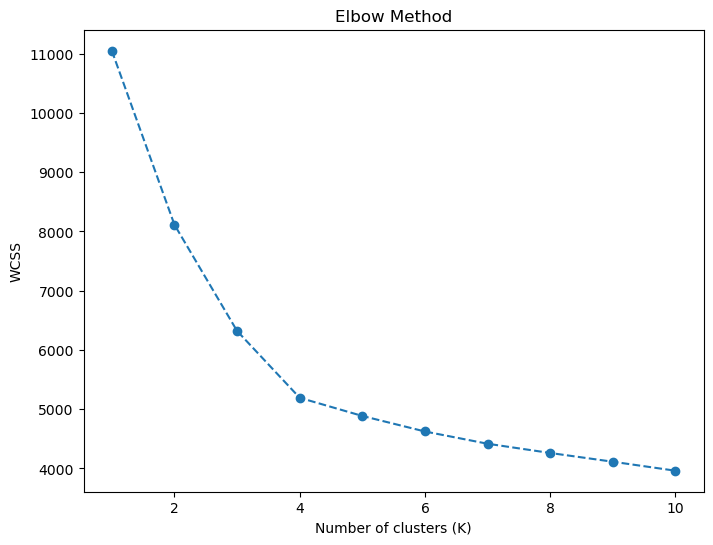

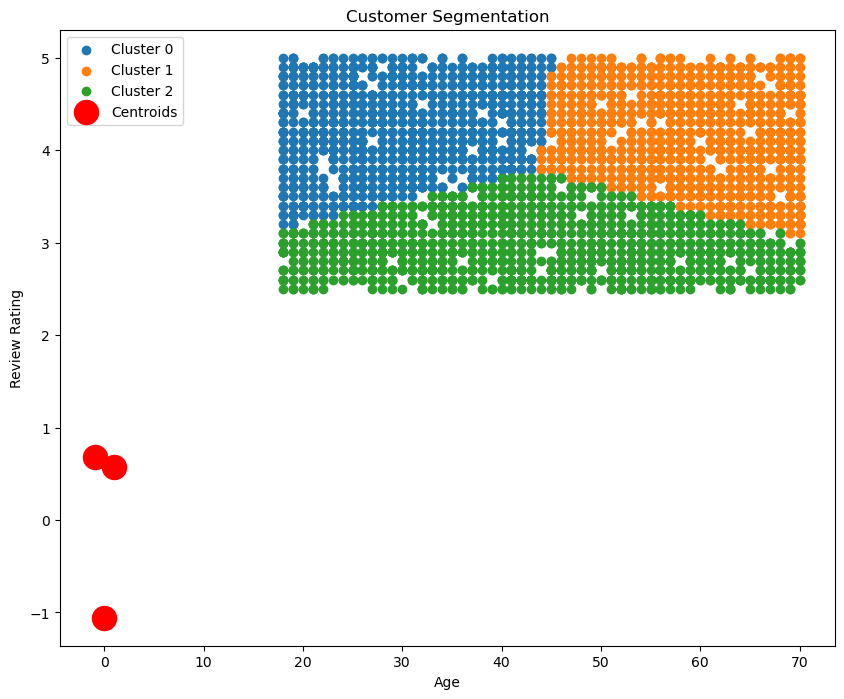

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your data (replace 'your_data.csv' with your actual data)
data = pd.read_csv("C://Users//TmC//Downloads//archive (1)//shopping_trends_updated.csv")

# Select the features for segmentation (e.g., 'Review Rating', 'Age', 'Payment Method')
selected_features = data[['Review Rating', 'Age', 'Payment Method']]

# Define which columns are categorical and which are numerical
categorical_features = ["Payment Method"]
numerical_features = ["Review Rating", "Age"]

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine the transformers using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing
preprocessed_features = preprocessor.fit_transform(selected_features)

# Determine the optimal number of clusters (K) using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(preprocessed_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow Method, choose an appropriate K (number of clusters)
k = 3  # Adjust this value based on the Elbow Method plot

# Apply K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(preprocessed_features)

# Visualize the customer segments
plt.figure(figsize=(10, 8))
for cluster in range(k):
    plt.scatter(data[data['Cluster'] == cluster]['Age'], data[data['Cluster'] == cluster]['Review Rating'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.legend()
plt.show()


# Q7

In [101]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your preprocessed data
data = pd.read_csv("C://Users//TmC//Downloads//archive (1)//shopping_trends_updated.csv")

# Define your features for clustering (e.g., using numerical columns)
X = data[['Review Rating', 'Previous Purchases']]

# Choose the number of clusters (you can experiment with different values)
n_clusters = 5

# Fit K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Calculate silhouette score to evaluate the model
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Analyze the clusters
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Review Rating', 'Previous Purchases'])
cluster_centers['Cluster'] = range(n_clusters)
print(cluster_centers)

# Interpretation and marketing insights can be provided here.


C:\Users\TmC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.55
   Review Rating  Previous Purchases  Cluster
0       3.743494           33.901524        0
1       3.788277            4.798023        1
2       3.767769           45.007084        2
3       3.751375           23.467500        3
4       3.695231           13.960983        4


# Q6

In [ ]:
# from sklearn.model_selection import GridSearchCV

# Define a range of K values to test
param_grid = {'n_neighbors': list(range(1, 21))}

# Create KNN model
knn_model = KNeighborsClassifier()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best hyperparameter values
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print(f'Best K: {best_k}, Best Accuracy: {best_accuracy}')

# Q8

In [111]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming customer_data is the preprocessed DataFrame with features
X = customer_data[['Purchase Amount (USD)', 'Age', 'Previous Purchases']]

# Choose the number of clusters (segments)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_data['Subscription Status'] = kmeans.fit_predict(X)

# Assume you have a product catalog DataFrame
product_catalog = pd.DataFrame({
    'product_id': range(1, 11),
    'product_name': [f'Product_{i}' for i in range(1, 11)]
})

# Define a function to recommend products for a given customer segment
def recommend_products(segment):
    segment_products = product_catalog.sample(3)  # Recommend 3 random products
    return segment_products

# Example: Recommend products for customers in segment 0
segment_0_recommendations = recommend_products(0)
print("Product Recommendations for Segment 0:")
print(segment_0_recommendations)

C:\Users\TmC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Product Recommendations for Segment 0:
   product_id product_name
4           5    Product_5
9          10   Product_10
3           4    Product_4


# Q9

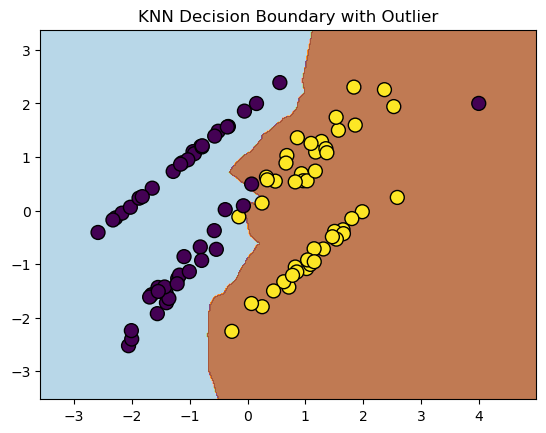

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Create a synthetic dataset with outliers
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X[-1] = [4, 2]  # Adding an outlier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y)

# Plot decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the dataset and decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
plt.title("KNN Decision Boundary with Outlier")
plt.show()